# Linear Regression Bike Sharing Assignment - EPGP ML & AI C37

This notebook has been prepared by **Poolakit Bharadwaj** for submission towards the Linear Regression bike sharing assignment for Upgrad's EPGP in ML & AI (C37)

# Problem Statement

A US bike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, the company wants to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

As part of a consulting company contracted by the bike-sharing service provider, we are supposed to model the demand for shared bikes with the given independent variables.It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. The model should be built taking 'cnt', indicating the count of total rental bikes as the target variable.

In [1]:
#Importing the required libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#to have plots inline

%matplotlib inline 

#Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and storing in a dataframe for further analysis

df = pd.read_csv('day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

#the dataset contains no missing values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Creating a deep copy of the dataframe for further process

df_bike = df.copy(deep=True)

df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Rename the columns for clarity

df_bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

df_bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#Mapping variables season, month, weathersit, weekday

df_bike['season']=df_bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

df_bike['month']=df_bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df_bike['weathersit']=df_bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

df_bike['weekday']=df_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df_bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping the unnecessary variables from the dataframe

**Instant**, **dteday**, **casual**, **registered**, **atemp**

In [8]:
#drop unnecessary columns
df_bike=df_bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)

df_bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Visualising the numeric variables

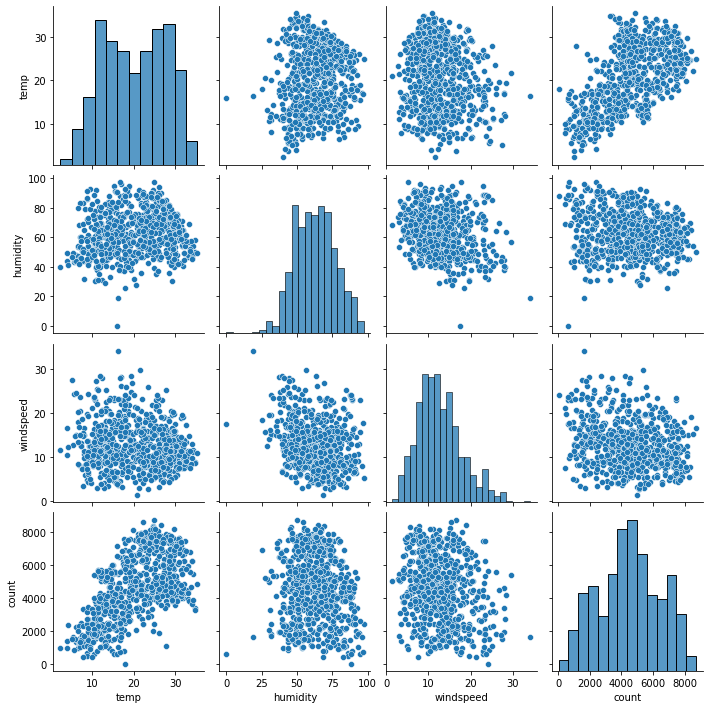

In [9]:
#Pairplot for numeric variables

sns.pairplot(df_bike, vars=["temp", "humidity",'windspeed','count'])

plt.show()

### 'Temp' variable seems to be the most correlated with the target variable 'count'

## Visualising the categorical variables

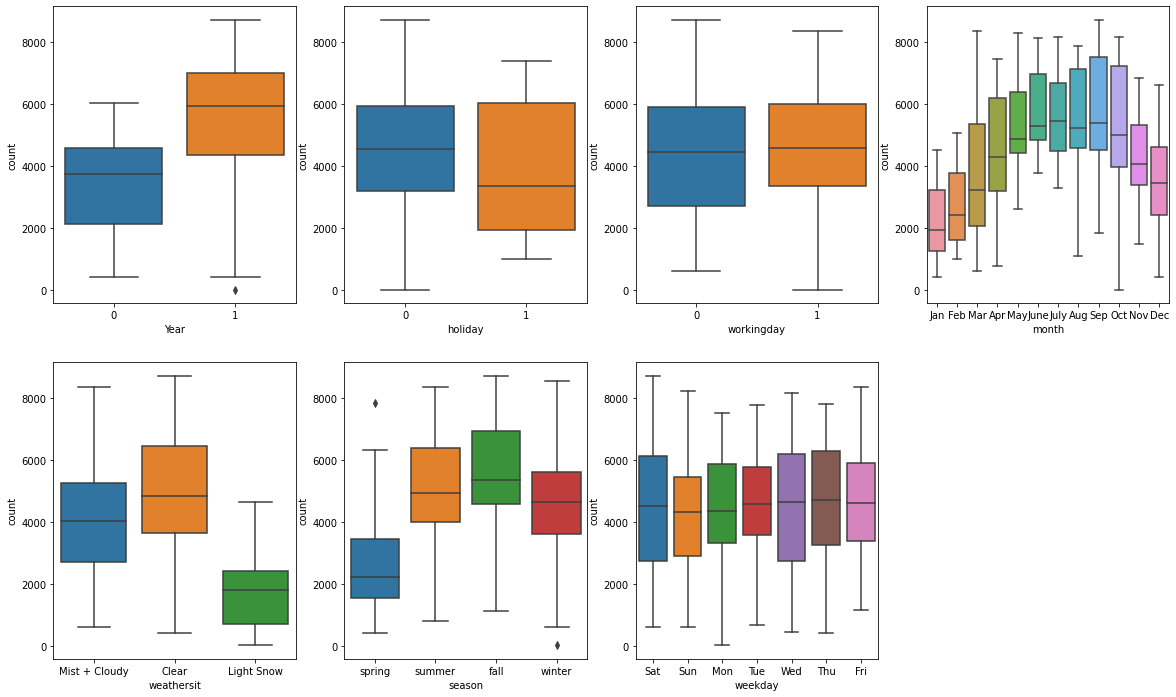

In [10]:
##Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)

sns.boxplot(x = 'Year', y = 'count', data = df_bike)

plt.subplot(2,4,2)

sns.boxplot(x = 'holiday', y = 'count', data = df_bike)

plt.subplot(2,4,3)

sns.boxplot(x = 'workingday', y = 'count', data = df_bike)

plt.subplot(2,4,4)

sns.boxplot(x = 'month', y = 'count', data = df_bike)

plt.subplot(2,4,5)

sns.boxplot(x = 'weathersit', y = 'count', data = df_bike)

plt.subplot(2,4,6)

sns.boxplot(x = 'season', y = 'count', data = df_bike)

plt.subplot(2,4,7)

sns.boxplot(x = 'weekday', y = 'count', data = df_bike)

plt.show()


### The plots above show the relationship between categorical variables and the target variable -

#### - Bike rentals are more in the year 2019 compared to 2018
#### - Bike rentals are more in partly cloudy weather
#### - Bike rentals are more during the Fall season than in Summer
#### - Bike rentals are more on Saturday and Wednesday

# Bivariate with the target variable

## 1. Season

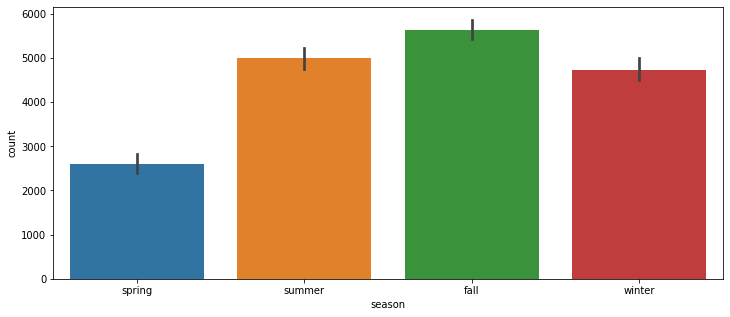

In [11]:
plt.figure(figsize=(12,5))

sns.barplot(x='season', y='count', data=df_bike)

plt.show()

### The fall season gets the most bookings followed by summer

## 2. Year

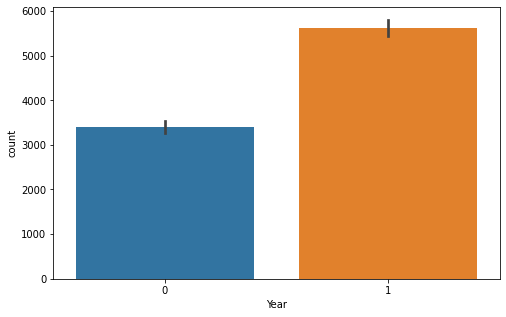

In [12]:
plt.figure(figsize=(8,5))

sns.barplot(x='Year', y='count', data=df_bike)

plt.show()

### ~62% of the rentals have been made in 2019, indicating a huge YOY jump in the business

## 3. Weathersit

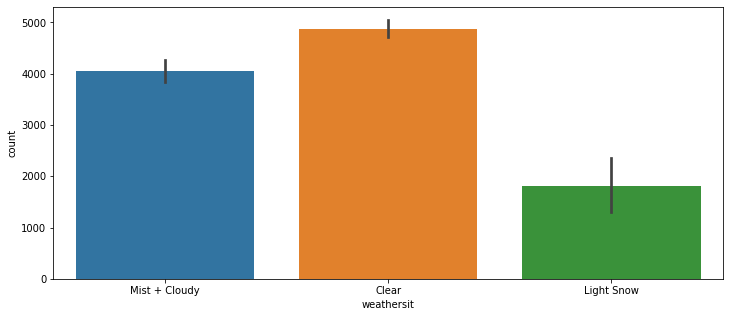

In [13]:
plt.figure(figsize=(12,5))

sns.barplot(x='weathersit', y='count', data=df_bike)

plt.show()

### ~70% of rentals have been made during the Clear weather

## 4. Month

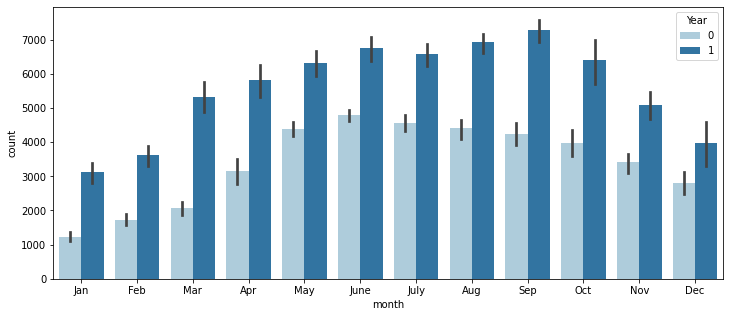

In [14]:
plt.figure(figsize=(12,5))
sns.barplot('month','count',hue='Year',data=df_bike,palette='Paired')
plt.show()

### Rentals are more during the mid months of the year for both 2018 and 2019

## 5. Holiday

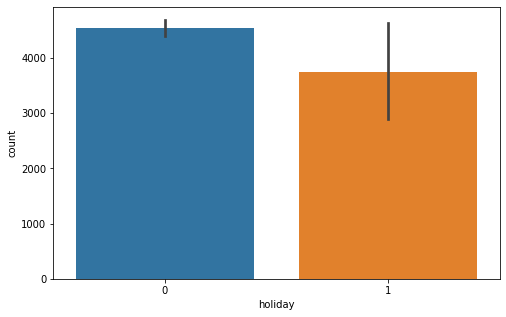

In [15]:
plt.figure(figsize=(8,5))

sns.barplot(x='holiday', y='count', data=df_bike)

plt.show()

### Rentals are less during the holidays

## 6. Temperature

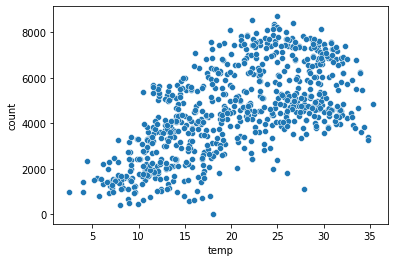

In [16]:
#scatter plot for temperature to count

sns.scatterplot(x='temp',y='count',data=df_bike)

plt.show()

### Rentals are increasing with increase in temperature

## 7. Humidity

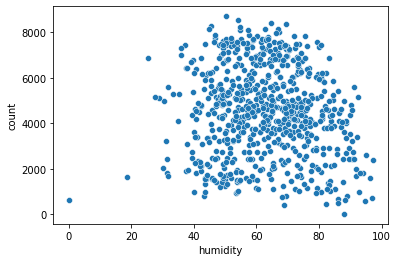

In [17]:
#scatter plot for humidity to count

sns.scatterplot(x='humidity',y='count',data=df_bike)

plt.show()

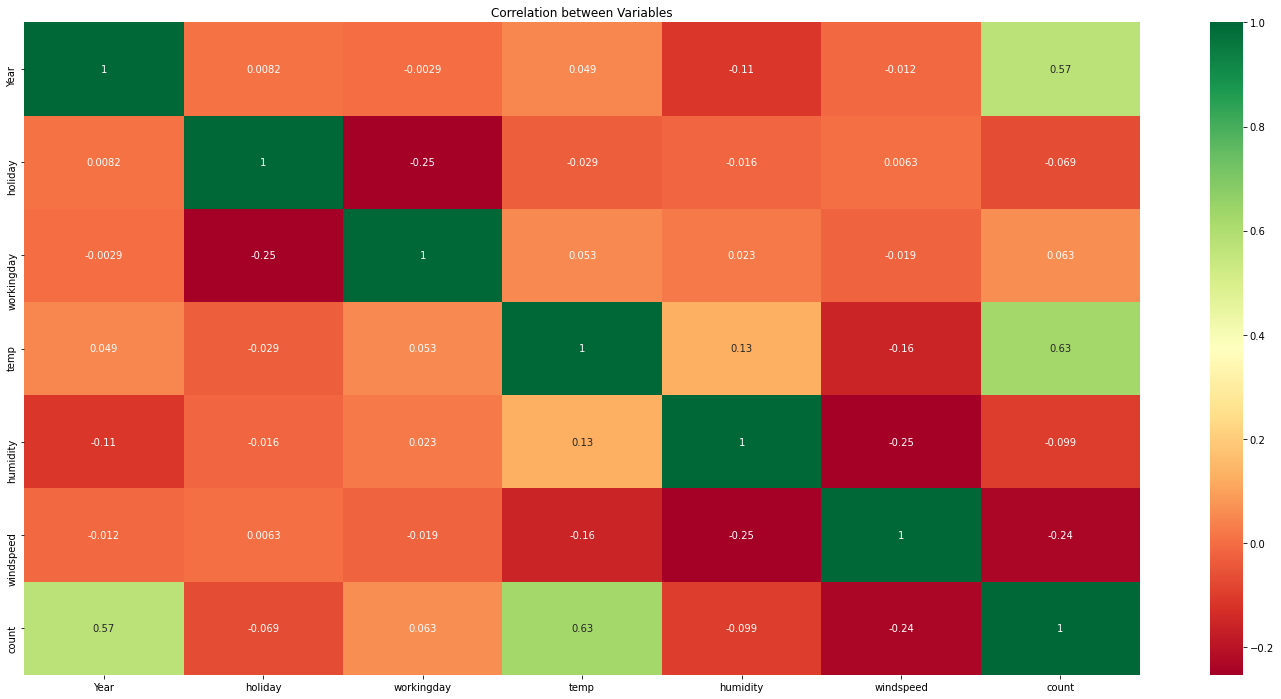

In [18]:
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 12))

sns.heatmap(df_bike.corr(), cmap='RdYlGn', annot = True)

plt.title("Correlation between Variables")

plt.show()

### From the above heatmap, we can see the temp and year variables are highly correlated to 'count' variable

### Thus we can proceed with the Linear Regression model

## Dummy variables

In [19]:
#Creating the dummy variables for month, weekday, weather_sit and season

months=pd.get_dummies(df_bike.month, drop_first=True)

weekdays=pd.get_dummies(df_bike.weekday, drop_first=True)

weather_sit=pd.get_dummies(df_bike.weathersit, drop_first=True)

seasons=pd.get_dummies(df_bike.season, drop_first=True)


In [20]:
# Add the results to the original bike dataframe

df_bike=pd.concat([months,weekdays,weather_sit,seasons,df_bike], axis=1)

df_bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [21]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it

df_bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

pd.set_option('display.max_columns', None)

df_bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


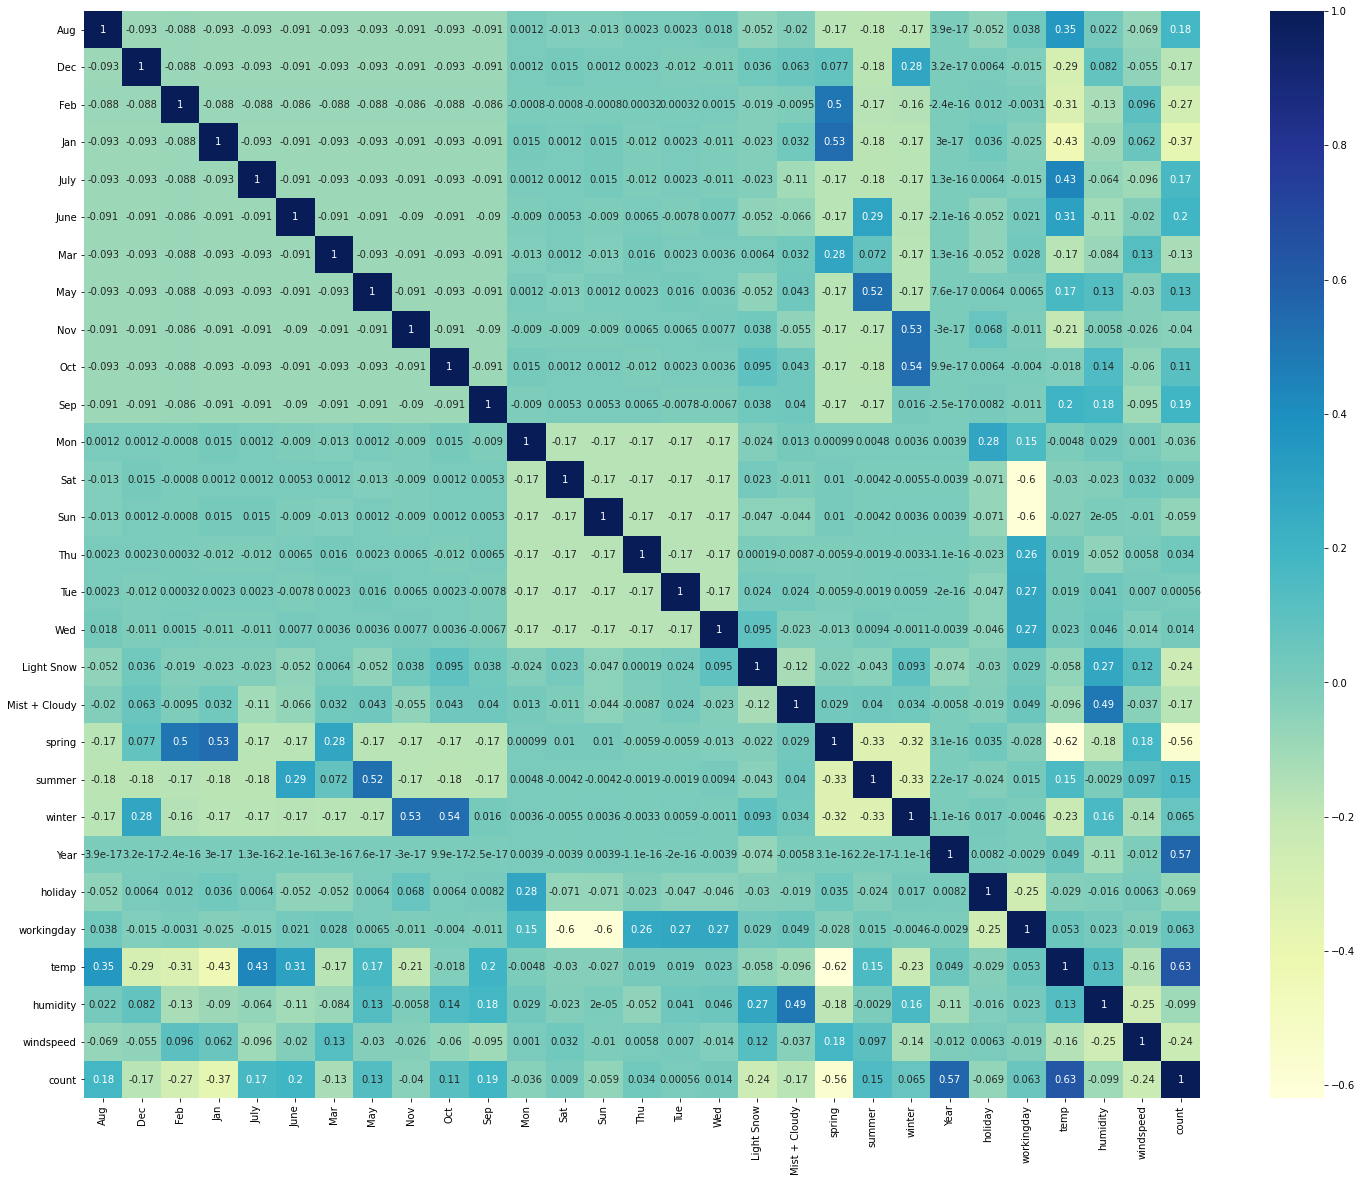

In [22]:
#checking the correlation between variables again

plt.figure(figsize=(25, 20))

sns.heatmap(df_bike.corr(), cmap='YlGnBu', annot = True)

plt.show()

# Splitting the data into train and test

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_bike_train, df_bike_test = train_test_split(df_bike, train_size = 0.7, random_state = 100)

In [24]:
#Checking the shape of data after splitting

print(df_bike_train.shape)
print(df_bike_test.shape)

(510, 29)
(220, 29)


## Scaling the features

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

- There are two common methods of scaling:

- Min-Max scaling or Normalisation: Values of variables are restricted between 0 and 1

- Standardisation : Mean of the variables becomes 0 and Standard Deviation 1

### Min-Max scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
#Instantiate an object

scaler = MinMaxScaler(feature_range=(0,1))

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit and transform on training data
df_bike_train[num_vars] = scaler.fit_transform(df_bike_train[num_vars])

df_bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [27]:
#Checking the training data after scaling

pd.set_option('display.max_columns', None)

df_bike_train.describe()

#We can see that values of all the variables are between 0 and 1, so scaling is successful

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model

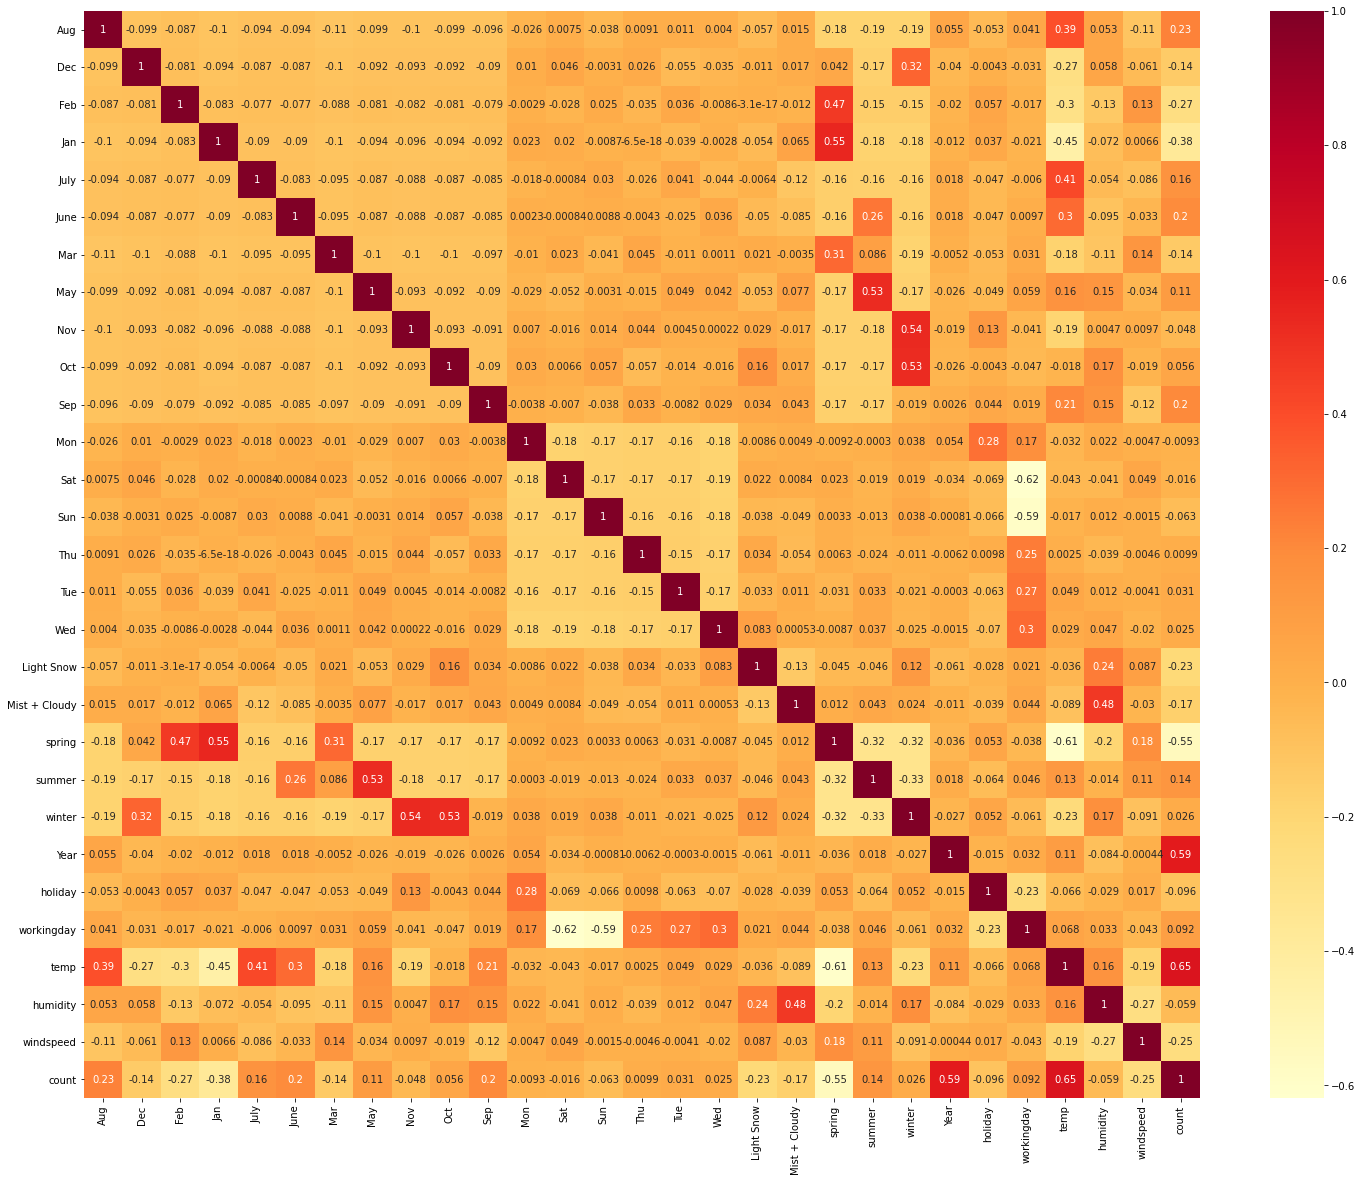

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling the training data

plt.figure(figsize=(25, 20))

sns.heatmap(df_bike_train.corr(),cmap='YlOrRd',annot = True)

plt.show()

### Defining the target and independent variables for model building

In [29]:
y_train = df_bike_train.pop('count')

X_train = df_bike_train

## Building a Linear Regression model

### Using Recursive Feature Elimination as there are too many variables

### Later on we can also do manual elimination

In [30]:
# Importing RFE and LinearRegression modules from sklearn

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [31]:
# Running RFE with number of variables equal to 15

lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             

rfe = rfe.fit(X_train, y_train)

In [32]:
#List of variables selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 10),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [33]:
#Columns with RFE support True

col = X_train.columns[rfe.support_]

col

Index(['Jan', 'July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'spring', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [34]:
#Columns where RFE support is False

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'summer'],
      dtype='object')

### Building model using statsmodels as it gives detailed statistics

In [35]:
# Creating new test dataframe with RFE selected variables

import statsmodels.api as sm

X_train_rfe = X_train[col]

In [36]:
# Checking the dataframe

X_train_rfe.head()

,Jan,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,Year,holiday,workingday,temp,humidity,windspeed
576,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,1,0,0,1,1,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,0,1,0,0,1,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,1,0,0,1,0,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,1,0,0,0,0,1,0.345824,0.751824,0.380981


In [37]:
#Adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
X_train_rfe.head()

,const,Jan,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,Year,holiday,workingday,temp,humidity,windspeed
576,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,1,0,0,1,1,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,1,0,0,1,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0.345824,0.751824,0.380981


In [39]:
# Running the linear model 

lm = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.51e-190
Time:                        22:05:55   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2521      0.025      9.930

## Checking VIF

In [41]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [42]:
# Calculate the VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,41.54
3,Sat,10.13
4,Sun,9.81
12,temp,3.19
7,spring,2.71
10,holiday,2.58
13,humidity,1.89
8,winter,1.81
6,Mist + Cloudy,1.57
0,Jan,1.55


### Dropping holiday as it is insignificant due to high p-value

In [43]:
#Drop holiday

X_train_rfe1 = X_train_rfe.drop(["holiday"], axis = 1)

### Rebuilding the model without 'holiday'

In [44]:
X_train_lm1 = sm.add_constant(X_train_rfe1)

lm1 = sm.OLS(y_train,X_train_lm1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.51e-190
Time:                        22:05:55   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2468      0.040      6.180

### Checking VIF again

In [45]:
#Dropping the constant

X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [46]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.73
11,temp,18.11
10,workingday,17.03
3,Sat,4.60
13,windspeed,4.55
4,Sun,4.47
7,spring,3.10
6,Mist + Cloudy,2.28
8,winter,2.17
9,Year,2.09


### Dropping 'humidity' variable as it has the highest VIF value

In [47]:
X_train_rfe2 = X_train_rfe1.drop('humidity', axis = 1)

X_train_rfe2.head()

,Jan,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,Year,workingday,temp,windspeed
576,0,1,0,0,0,0,0,0,0,1,1,0.815169,0.264686
426,0,0,0,1,0,0,1,1,0,1,0,0.442393,0.255342
728,0,0,0,0,1,0,0,1,0,1,0,0.245101,0.663106
482,0,0,0,1,0,0,1,0,0,1,0,0.395666,0.188475
111,0,0,0,0,0,0,1,0,0,0,1,0.345824,0.380981


### Rebuilding the model without 'humidity'

In [48]:
X_train_lm2 = sm.add_constant(X_train_rfe2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.52e-188
Time:                        22:05:55   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     496   BIC:                            -925.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1705      0.035      4.863

### Re-calculating VIF values

In [49]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [50]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,13.48
11,temp,12.77
12,windspeed,4.52
3,Sat,3.85
4,Sun,3.61
7,spring,2.85
9,Year,2.07
8,winter,1.78
0,Jan,1.65
6,Mist + Cloudy,1.59


### Dropping 'workingday' next as it has the highest VIF value and no variable is insignificant as per p-value

In [51]:
X_train_rfe3 = X_train_rfe2.drop('workingday', axis=1)

X_train_rfe3.head()

,Jan,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,Year,temp,windspeed
576,0,1,0,0,0,0,0,0,0,1,0.815169,0.264686
426,0,0,0,1,0,0,1,1,0,1,0.442393,0.255342
728,0,0,0,0,1,0,0,1,0,1,0.245101,0.663106
482,0,0,0,1,0,0,1,0,0,1,0.395666,0.188475
111,0,0,0,0,0,0,1,0,0,0,0.345824,0.380981


### Rebuilding the model without 'workingday'

In [52]:
X_train_lm3 = sm.add_constant(X_train_rfe3)

lm3 = sm.OLS(y_train,X_train_lm3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.23e-185
Time:                        22:05:55   Log-Likelihood:                 498.33
No. Observations:                 510   AIC:                            -970.7
Df Residuals:                     497   BIC:                            -915.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2704      0.025     10.968

### Re-calculating the VIF values

In [53]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [54]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.75
11,windspeed,4.04
7,spring,2.26
9,Year,2.06
0,Jan,1.60
6,Mist + Cloudy,1.53
8,winter,1.41
1,July,1.36
3,Sat,1.22
4,Sun,1.21


### Dropping 'Sat' variable as it has high p-value

In [55]:
X_train_rfe4 = X_train_rfe3.drop('Sat', axis = 1)

X_train_rfe4.head()

,Jan,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,winter,Year,temp,windspeed
576,0,1,0,0,0,0,0,0,1,0.815169,0.264686
426,0,0,0,0,0,1,1,0,1,0.442393,0.255342
728,0,0,0,1,0,0,1,0,1,0.245101,0.663106
482,0,0,0,0,0,1,0,0,1,0.395666,0.188475
111,0,0,0,0,0,1,0,0,0,0.345824,0.380981


### Rebuilding the model without 'Sat' variable

In [56]:
X_train_lm4 = sm.add_constant(X_train_rfe4)

lm4 = sm.OLS(y_train,X_train_lm4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.99e-186
Time:                        22:05:55   Log-Likelihood:                 497.39
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2732      0.025     11.110

### Re-calculating VIF values

In [57]:
#Drop the constant

X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [58]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.69
10,windspeed,4.01
6,spring,2.25
8,Year,2.06
0,Jan,1.60
5,Mist + Cloudy,1.53
7,winter,1.40
1,July,1.36
2,Sep,1.20
3,Sun,1.17


## Residual analysis

We need to check if the error terms are normally distributed as it is a major assumption of Linear Regression

In [59]:
#y train predicted

X_train_lm4 = sm.add_constant(X_train_rfe4) #adding the const again for the prediction

y_train_pred = lm4.predict(X_train_lm4)

<AxesSubplot:ylabel='Density'>

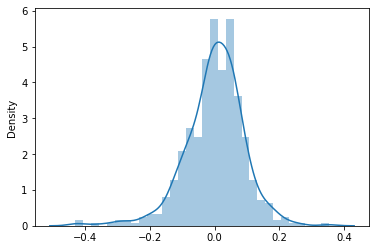

In [60]:
#Calculating and plotting the residual

res = y_train - y_train_pred

sns.distplot(res)

### Predictions and evaluations on the test set

In [61]:
# List of numeric variables for scaling

num_vars=['temp','humidity','windspeed','count']

# 2. Fit on data
df_bike_test[num_vars] = scaler.transform(df_bike_test[num_vars])

df_bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [62]:
pd.set_option('display.max_columns', None)

df_bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [63]:
df_bike_test[df_bike_test['windspeed']<0]

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
279,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.562844,0.705024,-0.042808,0.570985


In [64]:
y_test = df_bike_test.pop('count')
X_test = df_bike_test

In [65]:
#add a constant

X_test_sm = sm.add_constant(X_test)

X_test_sm

,const,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
184,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728
299,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.511964,0.837699,0.334206
221,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.817246,0.314298,0.537414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0.519232,0.756118,0.283397
127,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.584649,0.650923,0.069510
640,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0.745598,0.817947,0.052115
72,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.331557,0.512107,0.203418


In [66]:
X_test_sm = X_test_sm.drop(['holiday','humidity','workingday','Sat','Aug','Dec','Feb','June','Mar','May','Nov','Oct','Mon',
                            'Thu','Tue','Wed','summer'], axis=1)

In [67]:
X_test_sm.head()

,const,Jan,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,winter,Year,temp,windspeed
184,1.0,0,1,0,0,0,1,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,0,0,0,0,1,0.901354,0.153728
299,1.0,0,0,0,0,0,1,0,1,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,0,0,0,0,0.817246,0.537414


In [68]:
#predict

y_test_pred = lm4.predict(X_test_sm)

In [69]:
# evaluate the model

from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8054582636162073

In [70]:
# Adjusted R square

Adj_r2 = 1-(1-0.8054582636162073)*(11-1)/(11-1-1)

print(Adj_r2)

0.7838425151291193


### Checking for Homoscedasticity

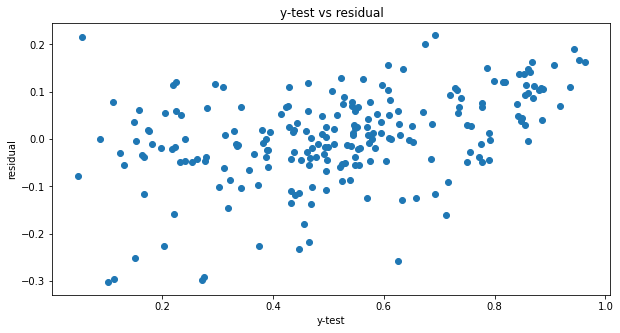

In [71]:

plt.figure(figsize=(10, 5))

res_test = y_test - y_test_pred

plt.scatter(y_test, res_test)
plt.title("y-test vs residual")
plt.xlabel("y-test")
plt.ylabel("residual")

plt.show()

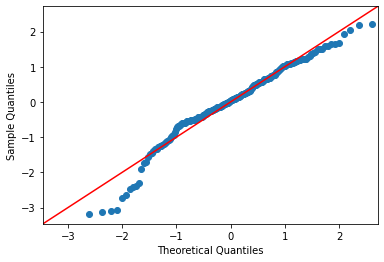

In [72]:
sm.qqplot(res_test, fit=True, line='45')
plt.show()

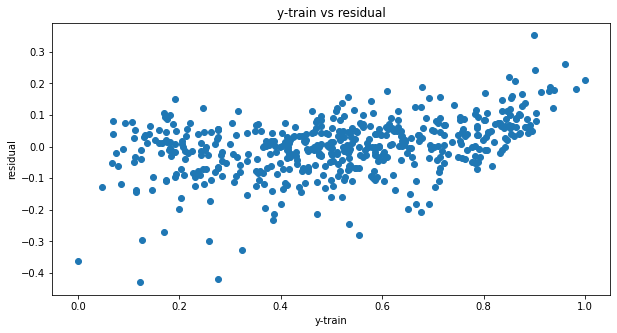

In [73]:

plt.figure(figsize=(10, 5))

res = y_train - y_train_pred #residual value for train

plt.scatter(y_train, res)
plt.title("y-train vs residual")
plt.xlabel("y-train")
plt.ylabel("residual")

plt.show()

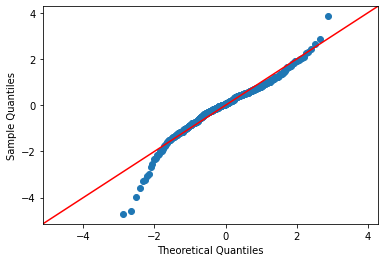

In [74]:
sm.qqplot(res, fit=True, line='45')
plt.show()

### We can see that the errors in the model do not vary much and are equally spread, so we can safely assume that the condition of homoscedasticity is satisfied

## Regression plot

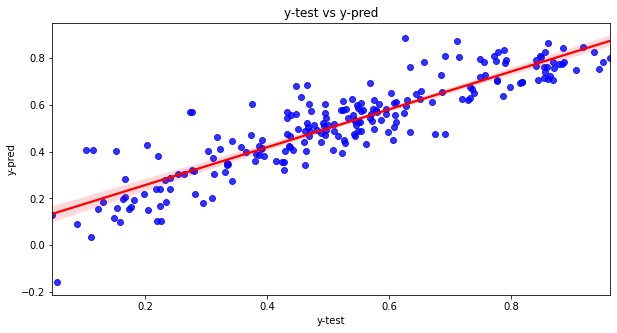

In [75]:
plt.figure(figsize=(10, 5))

sns.regplot(x=y_test, y=y_test_pred, fit_reg= True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title("y-test vs y-pred")
plt.xlabel("y-test")
plt.ylabel("y-pred")

plt.show()

**The equation of the model is as below -** 
 
**count = 0.4304 x temp - 0.0449 x Jan - 0.0661 x July + 0.0532 x Sep - 0.0447 x Sun - 0.2873 x Light Snow - 0.0787 x Mist+Cloudy - 0.1047 x spring + 0.0396 x winter + 0.2354 x Year - 0.1499 x windspeed**

### Model results comparison between train and test data:

- Training R squared: 0.834
- Training Adjusted R squared: 0.831
- Test R squared: 0.805
- Test Adjusted R squared: 0.783
- Difference in Train and Test R squared: 2.9%

**As the difference in R squared values is <5%, the model is performing quite well**

### Model Interpretation and business strategy:

- Our model to predict the demand for shared bikes is doing quite well with the given set of independent variables

- The temperature variable has the highest coefficient 0.4304, which means if the temperature rises by 1 unit, the number of bike rentals increases by 0.4304

- The Light Snow and the Mist+Cloudy variables have negative coefficients, which means a reduction in bike rentals

- The windspeed variable also has a negative coefficient, which means a reduction in bike rentals with increase in the windspeed

- Spring season has negative coefficients, so the company can run some discount offers to attract the customers to book more

- Sunday is seeing a drop in bookings so the company can run some promotional events in and around parks and leisure spots